# Import Required Libraries
Import libraries such as pandas, numpy, sklearn, and matplotlib.

In [ ]:
!pip install scikit-learn
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [3]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical computations
from sklearn.model_selection import train_test_split  # For splitting the dataset
from sklearn.tree import DecisionTreeRegressor  # For the Decision Tree model
from sklearn.metrics import mean_squared_error, r2_score  # For model evaluation
import matplotlib.pyplot as plt  # For data visualization

# Load the California Housing Dataset
Use sklearn.datasets.fetch_california_housing to load the dataset into a pandas DataFrame.

In [4]:
# Load the California Housing Dataset
from sklearn.datasets import fetch_california_housing

# Fetch the dataset
california_housing = fetch_california_housing(as_frame=True)

# Convert to a pandas DataFrame
data = california_housing.frame

# Display the first few rows of the dataset
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Split the Dataset into Training and Testing Sets
Use train_test_split from sklearn.model_selection to split the dataset into training and testing sets.

In [5]:
# Split the dataset into features (X) and target (y)
X = data.drop(columns=["MedHouseVal"])  # Features
y = data["MedHouseVal"]  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

# Train a Decision Tree Regressor
Use sklearn.tree.DecisionTreeRegressor to train a decision tree model on the training data.

In [6]:
# Train a Decision Tree Regressor

# Initialize the Decision Tree Regressor
decision_tree = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the training data to check for overfitting
y_train_pred = decision_tree.predict(X_train)

# Predict on the test data
y_test_pred = decision_tree.predict(X_test)

# Evaluate the Model
Calculate evaluation metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R2) score.

In [7]:
# Evaluate the Model

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) score
r2 = r2_score(y_test, y_test_pred)

# Display the evaluation metrics
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 0.495235205629094
Root Mean Squared Error (RMSE): 0.7037294974840077
R-squared (R2): 0.622075845135081


# Visualize the Decision Tree
Use sklearn.tree.plot_tree to visualize the trained decision tree.

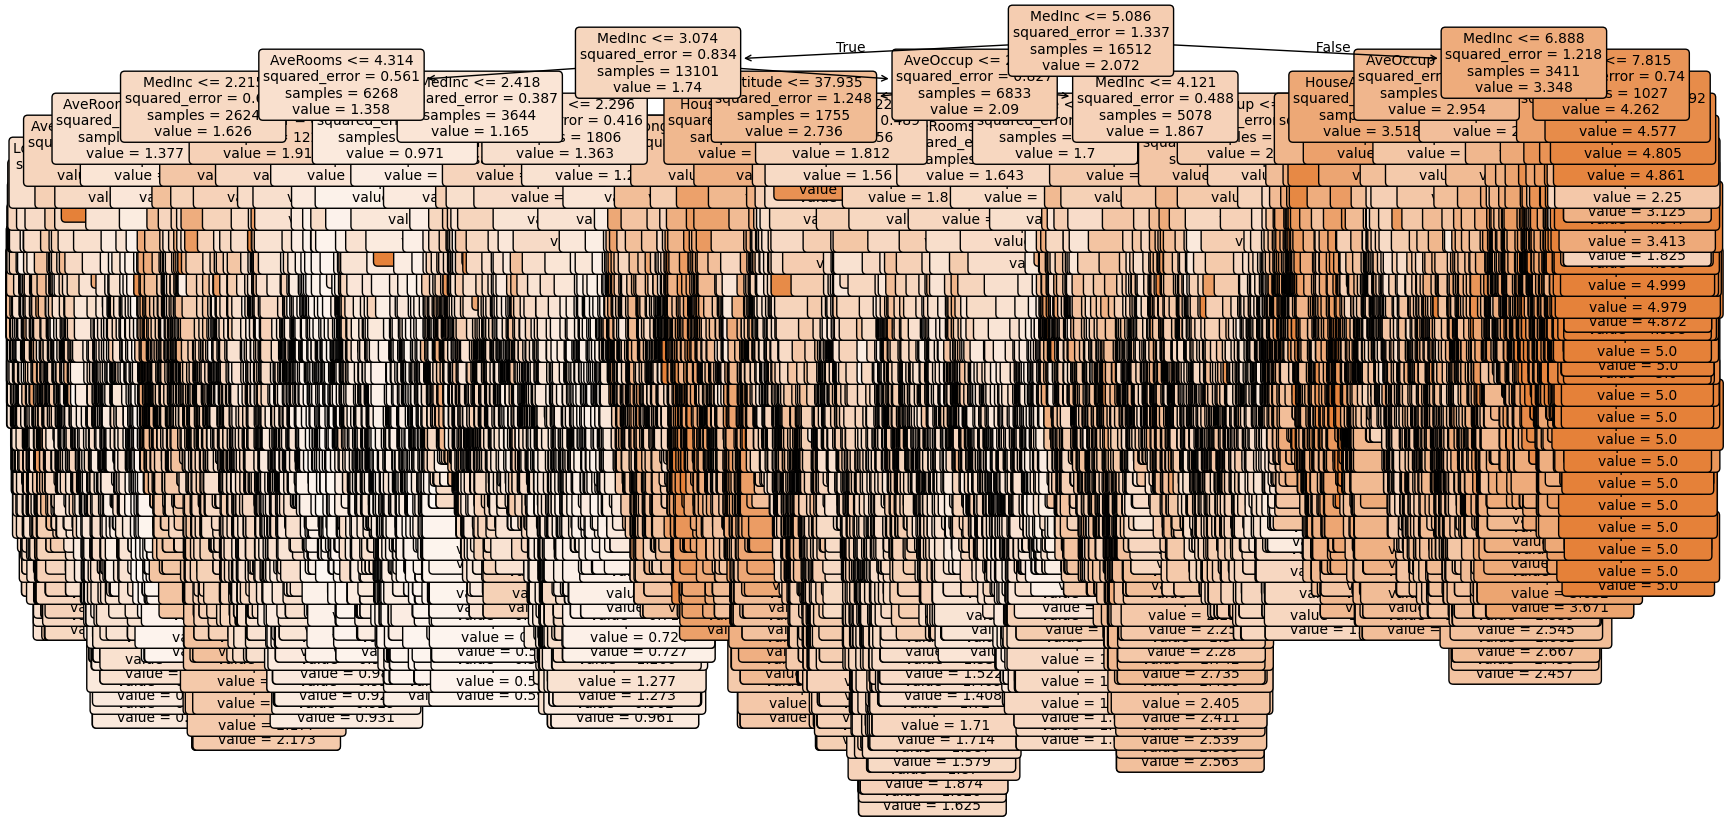

In [8]:
# Visualize the Decision Tree

from sklearn.tree import plot_tree  # Import the plot_tree function

# Set the figure size for better visualization
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(
    decision_tree, 
    feature_names=X.columns,  # Use feature names for better interpretability
    filled=True,  # Fill the nodes with colors to represent the output values
    rounded=True,  # Use rounded corners for better aesthetics
    fontsize=10  # Set font size for readability
)

# Display the plot
plt.show()